# Logistic Regression using Theano on MNIST digits dataset

In [151]:
import theano
from theano import tensor as T
import numpy as np
from load import mnist

In [152]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))

In [153]:
trX, teX, trY, teY = mnist(onehot=True)

Training set (input values X). We have 784 features because MNIST images are 28x28 pixels

In [161]:
trX.shape[1]

In [163]:
trY.shape[1]

Note that label matrix `trY` has 10 columns because it's a "one-hot" encoding of digits 0..9

In [164]:
X = T.fmatrix()
Y = T.fmatrix()
w = init_weights((784, 10))

In [165]:
learning_rate = 0.05
py_x = model(X, w)
y_pred = T.argmax(py_x, axis=1)
cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * learning_rate]]

In [166]:
train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)
Yground = np.argmax(teY, axis=1)

In [167]:
batch_size = 64
num_epochs = 100
accuracy_stats = []

for epoch in range(num_epochs):
    for start, end in zip(range(0, len(trX), batch_size), range(batch_size, len(trX), batch_size)):
        cost = train(trX[start:end], trY[start:end])
    accuracy = np.mean(Yground == predict(teX))
    accuracy_stats.append(accuracy)
    
    # every 10 epochs, print some stats
    if epoch % 10 == 0:
        print epoch, accuracy

0 0.8969
10 0.9195
20 0.9217
30 0.9226
40 0.9228
50 0.9241
60 0.9245
70 0.9244
80 0.9246
90 0.9247


In [168]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

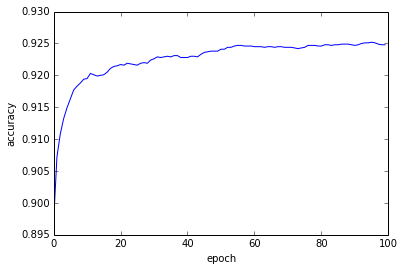

In [169]:
plt.plot(accuracy_stats)
plt.xlabel('epoch')
plt.ylabel('accuracy')

## Appendix 1: Categorical cross-entropy

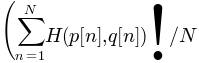

In [148]:
from IPython.display import display
from sympy import Sum, log, var, solve, symbols
from sympy.tensor import IndexedBase, Idx

from sympy import init_printing
init_printing()

H, y, n, N = var('H, y, n, N')
y = IndexedBase('y')
p = IndexedBase('p')
q = IndexedBase('q')
f = lambda p, q, N: (1/N) * Sum(H(p[n], q[n]), (n, 1, N))
display(f(p, q, N))

In [149]:
g = lambda y, p, N: -(1/N) * Sum(y[n] * log(p[n]) + (1 - y[n]) * log(1 - p[n]), (n, 1, N))

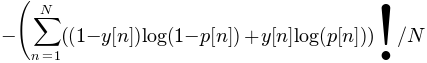

In [150]:
display(g(y, p, N))